In [10]:
!git clone https://github.com/pawij/amml-2526

fatal: destination path 'amml-2526' already exists and is not an empty directory.


In [11]:
import sys
sys.path.insert(0,'/content/amml-2526/src')

In [12]:
import torch
from model import VariationalAutoencoder

use_gpu = True
device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")

model0 = VariationalAutoencoder()
model0.load_state_dict(torch.load('/content/amml-2526/data/amml_model0_weights.pth', weights_only=True))
model0 = model0.to(device)
model0.eval()

model1 = VariationalAutoencoder()
model1.load_state_dict(torch.load('/content/amml-2526/data/amml_model1_weights.pth', weights_only=True))
model1 = model1.to(device)
model1.eval()

model2 = VariationalAutoencoder()
model2.load_state_dict(torch.load('/content/amml-2526/data/amml_model2_weights.pth', weights_only=True, map_location=torch.device('cpu')))
model2 = model2.to(device)
model2.eval()

VariationalAutoencoder(
  (conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (fc_mu): Linear(in_features=6272, out_features=20, bias=True)
  (fc_logvar): Linear(in_features=6272, out_features=20, bias=True)
  (fc_decode): Linear(in_features=20, out_features=6272, bias=True)
  (conv2_decode): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_decode): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)

In [13]:
from torch.utils.data import DataLoader

batch_size = 256

test_dataloader = DataLoader(torch.load('/content/amml-2526/data/test_dataset.pt', weights_only=False), batch_size=batch_size, shuffle=True)
holdout_dataloader = DataLoader(torch.load('/content/amml-2526/data/holdout_dataset.pt', weights_only=False), batch_size=batch_size, shuffle=True)

Original image from test set


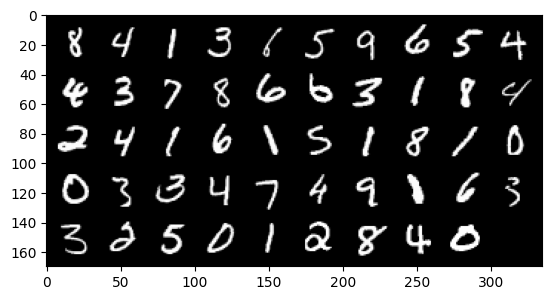

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

import torchvision.utils

# This function takes as an input the images to reconstruct
# and the name of the model with which the reconstructions
# are performed
def to_img(x):
    x = x.clamp(0, 1)
    return x

# DataLoader does not support indexing, so access by iterating
for images, labels in test_dataloader:
  break

# Visualise the original images
def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

print('Original image from test set')
show_image(torchvision.utils.make_grid(images[1:50],10,5))